# PARCtorch

This example demonstrates how to train a PARC model for the Burgers equation.
- Download the data from https://zenodo.org/records/13909869 and unzip it.
- It assumes that the data is stored in the data/burgers directory. Make sure to update the `train_dir` and `test_dir` below to point to the correct location.
- Install PARCtorch in the current python environment.


# <b>Notebook refinement Plan for Burgers.py <b>

- Targeted audience: Students, ML hobbyists, Researchers, Professionals (to what extent?), the extent of my explanations will be dependent on the targeted audience
- Create instruction guidelines for different environment setups, i.e. Colab, local VScode, HPC clouds, etc

- Explain the purpose of the Burgers equation, how PARC excels in predicting nonlinear transformations of fluid dynamics (if not comparing to other models in a short introductive way such as PINN), relating to why is it important to utilize PARC to model this equation

- Explain what each helper function does in short/concise/general terms. I.e. the differentiator computes xyz variables in the Burger's equation

- Explain the structure of this demo: how is the model trained, what is the purpose of creating ground truths, etc

- Interpreting the outcome: what does the outcome gif produced mean? does it simulate real fluid dynamics accurately/efficiently as promised?

# Colab Setup Instructions



In [ ]:
!rm -rf PARCtorch/

In [ ]:
%cd /content

/content


## 0. Change session to GPU to access CUDA's GPU power throughout the demo

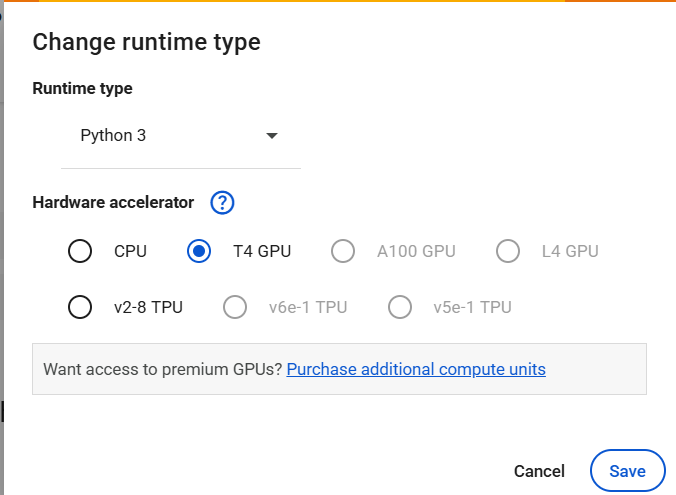

In [1]:
from IPython.display import Image, display

display(Image('change_session.png'))

## 1. Cloning github repo into Colab

In [ ]:
!git clone https://github.com/JuneWayne/PARCtorch.git

Cloning into 'PARCtorch'...
remote: Enumerating objects: 1310, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 1310 (delta 59), reused 49 (delta 49), pack-reused 1203 (from 1)
Receiving objects: 100% (1310/1310), 1.34 GiB | 24.78 MiB/s, done.
Resolving deltas: 100% (485/485), done.
Updating files: 100% (544/544), done.


## 2. Moving into the PARCtorch directory

In [ ]:
%cd PARCtorch/

/content/PARCtorch


In [ ]:
!ls -al

total 64
drwxr-xr-x 8 root root 4096 May  5 05:17 .
drwxr-xr-x 1 root root 4096 May  5 05:15 ..
-rwxr-xr-x 1 root root  113 May  5 05:17 build.sh
drwxr-xr-x 3 root root 4096 May  5 05:17 docs
drwxr-xr-x 8 root root 4096 May  5 05:17 .git
drwxr-xr-x 3 root root 4096 May  5 05:16 .github
-rw-r--r-- 1 root root 3235 May  5 05:16 .gitignore
-rw-r--r-- 1 root root 1069 May  5 05:16 LICENSE
drwxr-xr-x 9 root root 4096 May  5 05:17 PARCtorch
drwxr-xr-x 2 root root 4096 May  5 05:19 PARCtorch.egg-info
-rw-r--r-- 1 root root  910 May  5 05:17 pyproject.toml
-rw-r--r-- 1 root root  724 May  5 05:17 README_DEV.md
-rw-r--r-- 1 root root 1616 May  5 05:17 README.md
-rw-r--r-- 1 root root 1034 May  5 05:16 .readthedocs.yaml
-rw-r--r-- 1 root root   46 May  5 05:17 requirements.txt
drwxr-xr-x 2 root root 4096 May  5 05:17 tests


## 3. Download relevant dependencies in Colab's environment

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install numpy matplotlib tqdm imageio einops hydra-core


Looking in indexes: https://download.pytorch.org/whl/cu121


## 4. Installing the correct PARCtorch Library in Colab

In [ ]:
!pip install -e . --no-deps

Obtaining file:///content/PARCtorch
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for PARCtorch (pyproject.toml) ... done
  Created wheel for PARCtorch: filename=parctorch-0.3.0-0.editable-py3-none-any.whl size=4730 sha256=04c350fed08ce499251a16e2585a9c600ceaed3a8c3f81d923df97b68b47fdf1
  Stored in directory: /tmp/pip-ephem-wheel-cache-trli3n5i/wheels/b9/fd/c0/aac8e8ddf30d84cafd07fb989716e987c5547a3cf189247912
Successfully built PARCtorch
  Attempting uninstall: PARCtorch
    Found existing installation: PARCtorch 0.3.0
    Uninstalling PARCtorch-0.3.0:
      Successfully uninstalled PARCtorch-0.3.0


In [ ]:
!ls -al

total 64
drwxr-xr-x 8 root root 4096 May  5 05:17 .
drwxr-xr-x 1 root root 4096 May  5 05:15 ..
-rwxr-xr-x 1 root root  113 May  5 05:17 build.sh
drwxr-xr-x 3 root root 4096 May  5 05:17 docs
drwxr-xr-x 8 root root 4096 May  5 05:17 .git
drwxr-xr-x 3 root root 4096 May  5 05:16 .github
-rw-r--r-- 1 root root 3235 May  5 05:16 .gitignore
-rw-r--r-- 1 root root 1069 May  5 05:16 LICENSE
drwxr-xr-x 9 root root 4096 May  5 05:17 PARCtorch
drwxr-xr-x 2 root root 4096 May  5 05:23 PARCtorch.egg-info
-rw-r--r-- 1 root root  910 May  5 05:17 pyproject.toml
-rw-r--r-- 1 root root  724 May  5 05:17 README_DEV.md
-rw-r--r-- 1 root root 1616 May  5 05:17 README.md
-rw-r--r-- 1 root root 1034 May  5 05:16 .readthedocs.yaml
-rw-r--r-- 1 root root   46 May  5 05:17 requirements.txt
drwxr-xr-x 2 root root 4096 May  5 05:17 tests


## 5. Downgrading Matplotlib to avoid package errors from its newest update (3.10.0)

In [ ]:
!pip install matplotlib==3.9.0

In [ ]:
%cd PARCtorch/demos

/content/PARCtorch/PARCtorch/demos


In [ ]:
from pathlib import Path

from PARCtorch.data.normalization import compute_min_max

In [ ]:
# Define data directories
train_dir = Path("../data/train")
test_dir = Path("../data/test")
min_max_file = train_dir.parent / "b_min_max.json"

compute_min_max([train_dir, test_dir], min_max_file)

Calculating channel-wise min and max values for normalization...
Current working directory: /content/PARCtorch/PARCtorch/demos
Total files to process: 478
Processed 100/478 files.
Processed 200/478 files.
Processed 300/478 files.
Processed 400/478 files.
Processed 478/478 files.
Channel-wise min values: [np.float64(100.0), np.float64(2.1418748489818493e-15), np.float64(2.1418748489818493e-15)]
Channel-wise max values: [np.float64(15000.0), np.float64(0.9956901262849367), np.float64(0.9956901262849367)]
Min and max values saved to '/content/PARCtorch/PARCtorch/data/b_min_max.json'.


# Normalization

## Create Data Loader for Training

In [ ]:
import logging
import torch
from torch.utils.data import DataLoader

# Now import the utilities
from PARCtorch.data.dataset import (
    GenericPhysicsDataset,
    custom_collate_fn,
    InitialConditionDataset,
    initial_condition_collate_fn,
)
from PARCtorch.utilities.viz import (
    visualize_channels,
    save_gifs_with_ground_truth,
)

# Set up logging
logging.basicConfig(
    level=logging.INFO, format="%(asctime)s [%(levelname)s] %(message)s"
)

future_steps = 1
# Path to the min_max.json file
batch_size = 4

# Initialize the dataset
train_dataset = GenericPhysicsDataset(
    data_dirs=[train_dir],
    future_steps=future_steps,
    min_max_path=min_max_file,
)

# Create DataLoader for training dataset
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=1,
    pin_memory=True,
    collate_fn=custom_collate_fn,
)

Listing samples: 100%|██████████| 100/100 [00:00<00:00, 2772.03it/s]


## Visualize the Data was Loaded Properly

Channel Data Statistics:
Channel 0: IC min=0.6644295454025269, IC max=0.6644295454025269
  Step 1: min=0.6644295454025269, max=0.6644295454025269
Channel 1: IC min=7.64794982899275e-09, IC max=0.4998920261859894
  Step 1: min=7.64794982899275e-09, max=0.49605339765548706
Channel 2: IC min=7.64794982899275e-09, IC max=0.4998920261859894
  Step 1: min=7.64794982899275e-09, max=0.49605339765548706


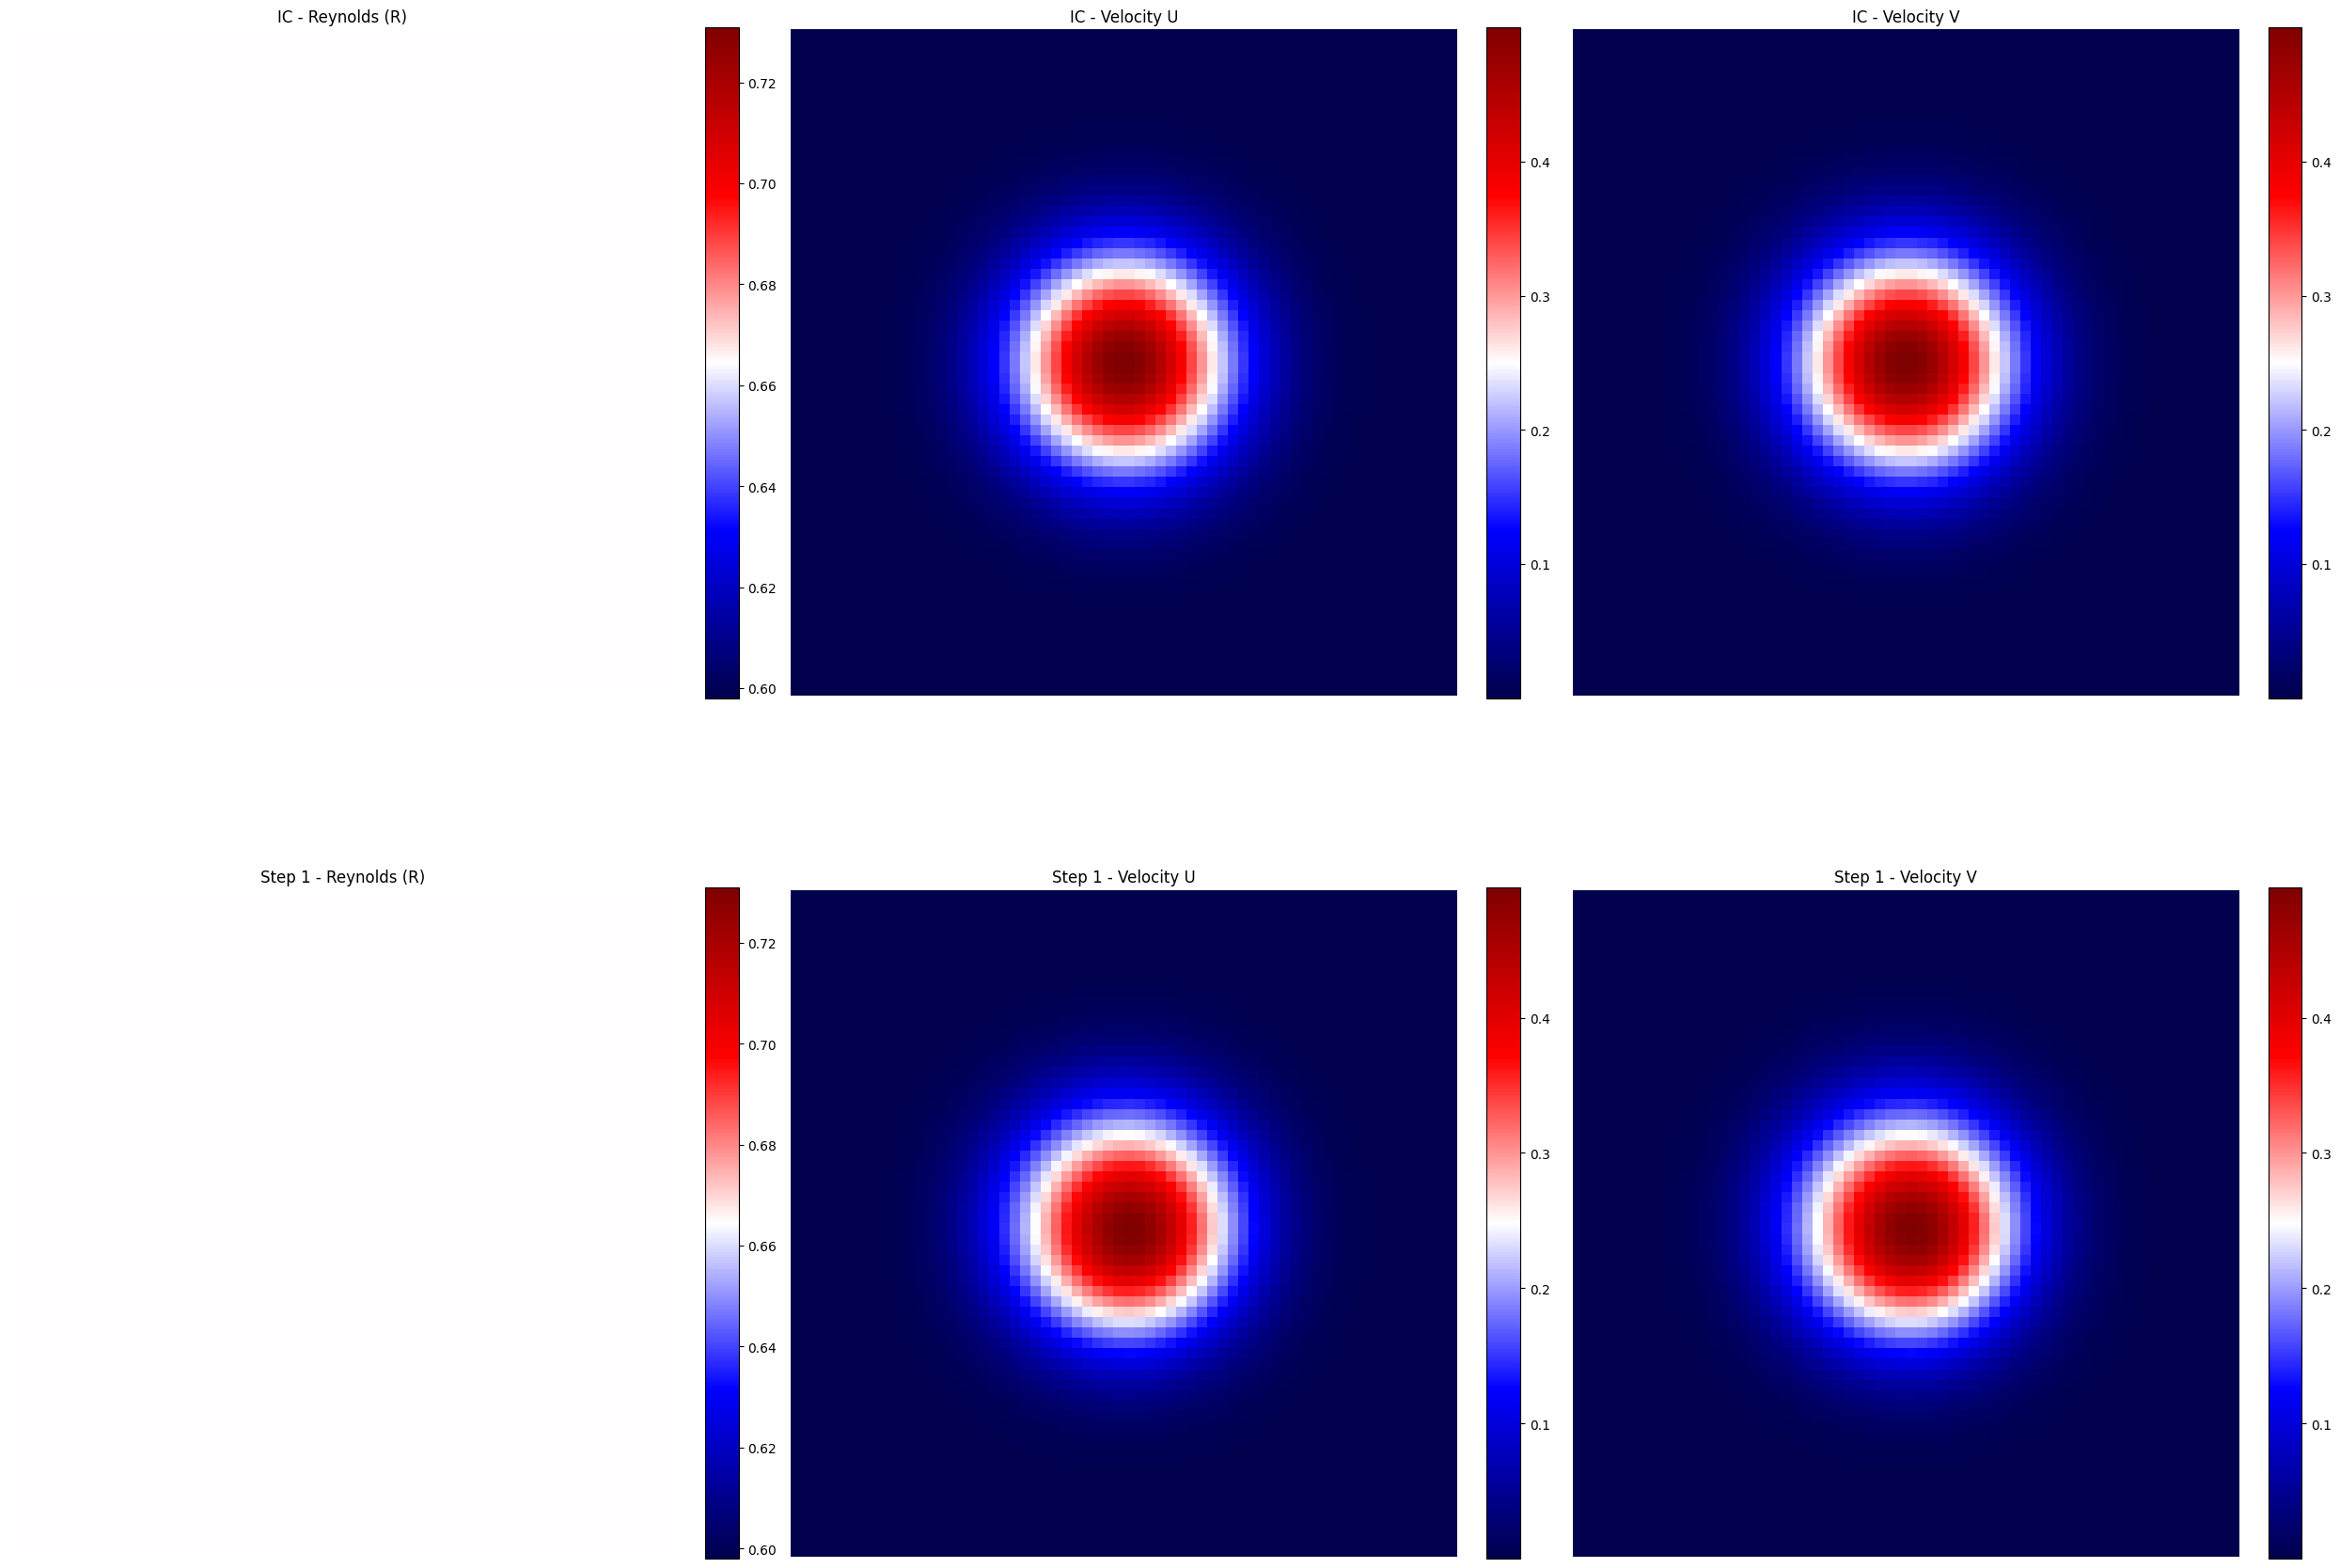

In [ ]:
# Fetch a batch and visualize
for batch in train_loader:
    ic, t0, t1, target = batch
    channel_names = ["Reynolds (R)", "Velocity U", "Velocity V"]
    custom_cmaps = ["seismic", "seismic", "seismic"]

    visualize_channels(
        ic,
        t0,
        t1,
        target,
        channel_names=channel_names,
        channel_cmaps=custom_cmaps,
    )
    break  # Visualize one batch for now

## Build your PARC Model

In [ ]:
from PARCtorch.PARCv2 import PARCv2
from PARCtorch.differentiator.differentiator import ADRDifferentiator
from PARCtorch.differentiator.finitedifference import FiniteDifference
from PARCtorch.integrator.integrator import Integrator
from PARCtorch.integrator.heun import Heun
from PARCtorch.utilities.unet import UNet

from torch.optim import Adam

In [ ]:
# Navier Stokes: p, re, u, v
# Adv: u, v
# Dif: u, v
# Poi: p
n_fe_features = 64
unet_burgers = UNet(
    [64, 64 * 2, 64 * 4],
    3,
    n_fe_features,
    up_block_use_concat=[False, True],
    skip_connection_indices=[0],
)
right_diff = FiniteDifference(padding_mode="replicate").cuda()
heun_int = Heun().cuda()
diff_burgers = ADRDifferentiator(
    1,  # 1 state variables: re. We always assume 2 velocity being the last 2 channels
    n_fe_features,  # Number of features returned by the feature extraction network: 64
    [1, 2],  # Channel indices to calculate advection: u and v
    [1, 2],  # Channel indices to calculate diffusion: u and v
    unet_burgers,  # Feature extraction network: unet_burgers
    "constant",  # Padding mode: constant padding of zero
    right_diff,  # Finite difference method: replication of image_gradients
    False,
).cuda()
burgers_int = Integrator(
    True, [], heun_int, [None, None, None], "constant", right_diff
)
criterion = torch.nn.L1Loss().cuda()
model = PARCv2(diff_burgers, burgers_int, criterion).cuda()
optimizer = Adam(model.parameters(), lr=1e-5)

## Train the Model

In [ ]:
from PARCtorch.train import train_model

# Example usage:
train_model(
    model,
    train_loader,
    criterion,
    optimizer,
    num_epochs=1,
    save_dir=train_dir.parent,
    app="burgers",
)

Epoch 1/1: 100%|██████████| 2500/2500 [02:06<00:00, 19.70it/s, Batch Loss=0.0001]

Epoch [1/1], Average Loss: 0.0006
Model weights saved at ../data/model.pth
Training losses saved at ../data/training_losses.pkl


## Load the Model

In [ ]:
from PARCtorch.utilities.load import load_model_weights

# Example Usage:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_weights_path = train_dir.parent / "model.pth"  # Replace with your path
model = load_model_weights(model, model_weights_path, device)

Loaded model weights from '../data/model.pth'


/content/PARCtorch/PARCtorch/utilities/load.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(weights_path, map_location=device)


## Create the Sequence DataLoader
### This will contain the t=0 for each test file

In [ ]:
# Initialize the dataset
future_steps = 3
seq_dataset = InitialConditionDataset(
    data_dirs=[test_dir],
    future_steps=future_steps,
    min_max_path=min_max_file,
)

# Create DataLoader for training dataset
seq_loader = DataLoader(
    seq_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=1,
    pin_memory=True,
    collate_fn=initial_condition_collate_fn,
)

Validating files: 100%|██████████| 378/378 [00:00<00:00, 6443.23it/s]


## Ground Truth Loader

In [ ]:
# Initialize the dataset
gt_dataset = GenericPhysicsDataset(
    data_dirs=[test_dir],
    future_steps=future_steps,
    min_max_path=min_max_file,
)

# Create DataLoader for training dataset
gt_loader = DataLoader(
    gt_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=1,
    pin_memory=True,
    collate_fn=custom_collate_fn,
)

Listing samples: 100%|██████████| 378/378 [00:00<00:00, 6043.07it/s]


## Visualize the Results

In [ ]:
# Set the model to evaluation mode
model.eval()

# Define channel names and colormaps
channels = ["Reynolds", "u", "v"]  # Adjust as per your data
cmaps = ["plasma", "inferno", "magma"]  # Adjust as per your preference

# Iterate through both DataLoaders simultaneously
for seq_batch, test_batch in zip(seq_loader, gt_loader):
    # Extract data from initial condition loader
    ic, t0, t1, _ = (
        seq_batch  # Shape: [batch_size, channels, height, width], scalar, tensor, _
    )

    # Extract data from ground truth loader
    gt_ic, gt_t0, gt_t1, ground_truth = (
        test_batch  # ground_truth shape: [timesteps, batch_size, channels, height, width]
    )

    # Move data to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    ic = ic.to(device)
    t0 = t0.to(device)
    t1 = t1.to(device)
    ground_truth = ground_truth.to(device)

    # Make predictions using the model
    with torch.no_grad():
        predictions = model(
            ic, t0, t1
        )  # Shape: [future_steps, batch_size, channels, height, width]

    print("Predictions shape:", predictions.shape)
    print(
        "Sample prediction for timestep 1:", predictions[:, 0, :, :, :].shape
    )

    # If you want to visualize more samples in the batch, loop through batch indices
    # For example, to visualize all samples in the batch:
    for batch_idx in range(ic.size(0)):
        save_gifs_with_ground_truth(
            predictions=predictions,
            ground_truth=ground_truth,
            channels=channels,
            cmaps=cmaps,
            filename_prefix=f"comparison_batch{batch_idx}",
            interval=0.2,
            batch_idx=batch_idx,
        )
        break

    break  # Remove this if you want to process the entire dataset

Predictions shape: torch.Size([3, 4, 3, 64, 64])
Sample prediction for timestep 1: torch.Size([3, 3, 64, 64])
GIF saved to comparison_batch0_Reynolds.gif
GIF saved to comparison_batch0_u.gif
GIF saved to comparison_batch0_v.gif
